In [4]:
%matplotlib inline
import requests
import pandas as pd
import io
import json


api_key = '<yourkey>'


url = "https://api.disruptive-technologies.com/v1/things"
headers = {'Authorization': 'ApiKey {api_key}'.format(api_key=api_key)}
jsonData = requests.get(url, headers=headers).json()
normalized = pd.io.json.json_normalize(jsonData['things'])
df = pd.DataFrame.from_dict(normalized)
df.set_index('id', inplace=True)

KeyError: 'things'

Showing the first couple of rows

In [2]:
df.head()

,description,firmware,last_updated,name,registered,starred,state.id,state.properties.battery_percentage,state.properties.battery_voltage,state.properties.connector_id,...,state.properties.rssi,state.properties.rssi_strength,state.properties.temperature,state.properties.touch,state.updated,type.chart_type,type.icon,type.id,type.name,type.primary
id,,,,,,,,,,,,,,,,,,,,,
206864770,,,2017-06-20T11:14:55.575300856Z,,2017-02-13T07:21:47.388302261Z,True,206864770,100,2.97,con-000,...,-69,5,24.0,False,2017-06-20T11:14:55.575300856Z,,,touch,,
206745349,,,2017-06-20T11:11:32.544821882Z,,2017-02-06T14:03:42.040924592Z,True,206745349,100,2.97,con-000,...,-68,5,24.0,False,2017-06-20T11:11:32.544821882Z,,,touch,,
206744455,,,2017-06-20T11:10:27.445202695Z,,2017-02-06T14:03:12.681973523Z,True,206744455,100,2.96,con-000,...,-69,5,24.0,False,2017-06-20T11:10:27.445202695Z,,,touch,,
206885895,,,2017-06-20T11:08:24.834988520Z,,2017-02-06T14:02:23.177445934Z,True,206885895,100,2.96,con-000,...,-79,3,28.0,False,2017-06-20T11:08:24.834988520Z,,,touch,,
b4vbgad847ng00d7bo9g,,,2017-06-12T16:40:53.260514189Z,Virtual touch sensor,2017-06-12T15:50:01.085487062Z,True,b4vbgad847ng00d7bo9g,100,3.00,,...,0,5,0.0,True,2017-06-12T16:40:53.260514189Z,,,touch,,


In [167]:
withoutVirtual = df[~df['name'].str.contains("Virtual")]
temperatureThings = withoutVirtual[withoutVirtual['type.id']=="temperature"]
notTemperatureThings = withoutVirtual[withoutVirtual['type.id']!="temperature"]

# Temperature distribution

- temp sensors in orange
- non-temp sensors in blue

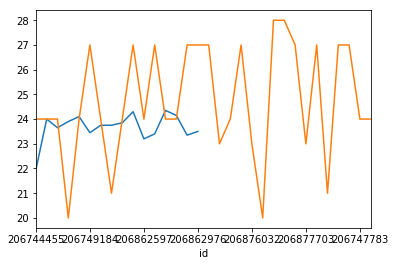

In [168]:
temperatureThings["state.properties.temperature"].plot(x='Temp sensors')
notTemperatureThings["state.properties.temperature"].plot(x='Non-temp sensors')

## Temperature standard deviations

count    48.000000
mean     24.388542
std       1.975683
min      20.000000
25%      23.487500
50%      24.000000
75%      27.000000
max      28.000000
Name: state.properties.temperature, dtype: float64


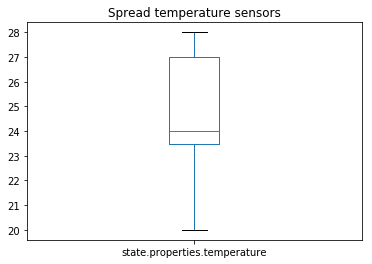

In [169]:
df_temps = withoutVirtual["state.properties.temperature"]
df_temps.plot.box(title='Spread temperature sensors')
print(df_temps.describe())

count    32.000000
mean     24.750000
std       2.314052
min      20.000000
25%      24.000000
50%      24.000000
75%      27.000000
max      28.000000
Name: state.properties.temperature, dtype: float64


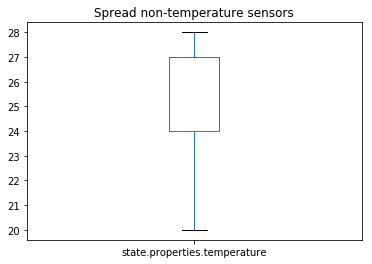

In [170]:
notTemperatureThings["state.properties.temperature"].plot.box(title='Spread non-temperature sensors')
print(notTemperatureThings["state.properties.temperature"].describe())

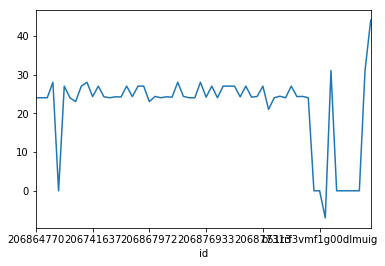

In [14]:
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
df['state.properties.temperature'].plot(x='last_updated')

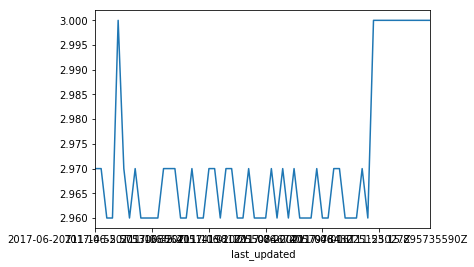

In [12]:
timedf = df.set_index('last_updated')
timedf['state.properties.battery_voltage'].plot()

# Aggregation

In [174]:
df.groupby(['state.properties.connector_id', 'type.id']).mean()

starred  \
state.properties.connector_id type.id                
                              temperature   0.0000   
                              touch         0.2500   
con-000                       proximity     0.0000   
                              temperature   0.0000   
                              touch         0.1875   

                                           state.properties.battery_percentage  \
state.properties.connector_id type.id                                            
                              temperature                                100.0   
                              touch                                      100.0   
con-000                       proximity                                  100.0   
                              temperature                                100.0   
                              touch                                      100.0   

                                           state.properties.battery_voltage  \
state.properties.connector_id type.id                                         
                              temperature                          3.000000   
                              touch                                3.000000   
con-000                       proximity                            2.960000   
                              temperature                          2.959375   
                              touch                                2.963750   

                                           state.properties.object_present  \
state.properties.connector_id type.id                                        
                              temperature                           0.0000   
                              touch                                 0.0000   
con-000                       proximity                             0.2500   
                              temperature                           0.0000   
                              touch                                 0.1875   

                                           state.properties.rssi  \
state.properties.connector_id type.id                              
                              temperature                 0.0000   
                              touch                       0.0000   
con-000                       proximity                 -71.5000   
                              temperature               -77.0625   
                              touch                     -73.9375   

                                           state.properties.rssi_strength  \
state.properties.connector_id type.id                                       
                              temperature                          5.0000   
                              touch                                5.0000   
con-000                       proximity                            4.1875   
                              temperature                          3.5000   
                              touch                                4.0000   

                                           state.properties.temperature  \
state.properties.connector_id type.id                                     
                              temperature                     37.500000   
                              touch                            0.000000   
con-000                       proximity                       24.562500   
                              temperature                     23.665625   
                              touch                           24.937500   

                                           state.properties.touch  
state.properties.connector_id type.id                              
                              temperature                  0.0000  
                              touch                        1.0000  
con-000                       proximity                    0.0000  
                              temperature                  0.0000  
                              touch  

In [175]:
df.groupby(['type.id']).max()

,description,firmware,last_updated,name,registered,starred,state.id,state.properties.battery_percentage,state.properties.battery_voltage,state.properties.connector_id,...,state.properties.object_present,state.properties.rssi,state.properties.rssi_strength,state.properties.temperature,state.properties.touch,state.updated,type.chart_type,type.icon,type.name,type.primary
type.id,,,,,,,,,,,,,,,,,,,,,
proximity,,,2017-06-12 14:59:53.204765683,,2017-02-06T14:04:02.087722665Z,False,206882306,100,2.97,con-000,...,True,-58,5,27.0,False,2017-06-12T14:59:53.204765683Z,,,,
temperature,Virtual sensor,,2017-06-12 14:57:23.257038715,Virtual temperature sensor,2017-06-12T08:05:17.592371260Z,False,b4v4mfd847ng00d7bo90,100,3.00,con-000,...,False,0,5,44.0,False,2017-06-12T14:57:23.257038715Z,,,,
touch,,,2017-06-12 21:13:17.692686973,Virtual touch sensor,2017-06-12T20:14:44.167591842Z,True,b4vfcd40jo2g00civgsg,100,3.00,con-000,...,True,0,5,28.0,True,2017-06-12T21:13:17.692686973Z,,,,
